In [47]:
%matplotlib inline

from modsim import *

In [48]:
m = UNITS.meter
s = UNITS.second
k = UNITS.meter * 1000
kg = UNITS.kilogram
cm = UNITS.centimeter
h = UNITS.hour
g = UNITS.gravity #gravity?

In [56]:
#condition = Condition(duration = 100 * h)
condition = Condition(accel=200,
                     vel = 0,
                     d_to_dest= 549,
                     cd = 0.035,
                     p = 1.29 * 10**-6,
                     d_traveled = 0,
                     area = 3.28,
                     v_max = 1200,
                     v_init=0 ,
                     t_safe=60,
                     t_accel = 5,
                     t_now = 0,
                     safe_accel = 2,
                     mass = 2500,
                     duration = 1000)

In [57]:
def make_system(conditon):
    unpack(condition)
    '''init = State(accel = 1 * m / s**2, 
                 vel = 0 * m / s, 
                 d_to_dest = 549 * k, 
                 d_traveled = 0 * k, 
                 cd = 0, 
                 p = 1.29 * 10**-6 * kg / cm*3,
                 area = 3.28 * m**2,
                 v_max = 1200 * k / h,
                 safe_accel = 3 * g,
                 duration = 100 * h
                )'''
    #init = State(accel=accel, d_to_dest=d_to_dest)
    init = State(d=d_traveled, v=v_init)
    ts = linspace(0, duration, 1000)
    return System(init=init, ts=ts)

In [61]:
def make_series(system):
    results = TimeSeries()
    system = make_system(condition)
    for t in range(0,7200):
        if t%t_accel == 0:
            for ac in range(t, t+int(t_accel)):
                results[ac]=accel
        else if t%t_safe == 0:
            for ac in range(t, t+int(t_safe)):
                results[ac]=acce
            
    return results

In [62]:
system = make_system(condition)

In [63]:
system.init

,value
d,0.0
v,0.0


In [64]:
def slope_func(state, t, system):
    '''accel, d_to_dest = state
    unpack(system)
    v = .1 * k/h
    if(v < v_max):
        v = accel * t * s
    x = .5 * v * t**3
    t_total = sqrt(2 * d_to_dest * (t*s) / v) 
    return  t_total, v'''
    
    x, v = state
    unpack(system)
    acc = make_series(system)
    if v < 1200:
        f_drag = p *v**2 * cd * area / 2
        a_drag = f_drag / mass
        dvdt = acc - a_drag
    else:
        dvdt=0
        
    dxdt = v
    
    
    
    return dxdt, dvdt

In [65]:
slope_func(system.init, 0, system)

(0.0, 0       200.0
 1         2.0
 2         2.0
 3         2.0
 4         2.0
 5       200.0
 6         2.0
 7         2.0
 8         2.0
 9         2.0
 10      200.0
 11        2.0
 12        2.0
 13        2.0
 14        2.0
 15      200.0
 16        2.0
 17        2.0
 18        2.0
 19        2.0
 20      200.0
 21        2.0
 22        2.0
 23        2.0
 24        2.0
 25      200.0
 26        2.0
 27        2.0
 28        2.0
 29        2.0
         ...  
 7170    200.0
 7171      2.0
 7172      2.0
 7173      2.0
 7174      2.0
 7175    200.0
 7176      2.0
 7177      2.0
 7178      2.0
 7179      2.0
 7180    200.0
 7181      2.0
 7182      2.0
 7183      2.0
 7184      2.0
 7185    200.0
 7186      2.0
 7187      2.0
 7188      2.0
 7189      2.0
 7190    200.0
 7191      2.0
 7192      2.0
 7193      2.0
 7194      2.0
 7195    200.0
 7196      2.0
 7197      2.0
 7198      2.0
 7199      2.0
 Length: 7200, dtype: float64)

In [ ]:
type()
type()

In [66]:
print(type(slope_func))
run_odeint(system, slope_func)

<class 'function'>


ValueError: setting an array element with a sequence.

(<Quantity(0.0, 'meter / second')>, <Quantity(-200.0, 'meter / second ** 2')>)

In [25]:
def final_state(results):
    """Returns the final position and velocity, with units.
    
    results: TimeFrame with x and v.
    
    returns: x, v at t_end
    """
    t_end = results.index[-1]
    x, v = results.loc[t_end]
    return x*m, v*m/s

In [26]:
final_state(system.results)
system.results

AttributeError: 'System' object has no attribute 'results'

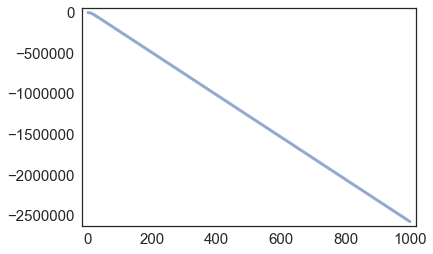

In [212]:
plot(system.results.index, system.results.d)

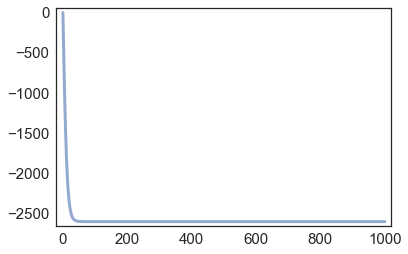

In [213]:
plot(system.results.index, system.results.v)

In [194]:
def time_func(accel, safe_accel, condition):
    condition.set(accel=accel, safe_accel=safe_accel)
    system = make_system(condition)
    run_odeint(system, slope_func)
    
    t = interp_inverse(system.results.d)
    tw = t(d_to_dest) 
    
    return tw

In [195]:
time_func(accel, safe_accel, condition)

array(460.6169216880701)

In [71]:
def i_hate_everything(accel, safe_accel, t_accel, t_safe, t_now, d_to_dest, condition):
        results = TimeSeries()
        system = make_system(condition)
        results[t_now] = 0
        a=0
        if results[a] < d_to_dest:
            if a < t_accel:
                for t in range (0, t_accel):
                    results[t+1] = results[t] + 1/2 * accel * t **2
                    a = t
            else:
                for t in range (0, t_safe):
                    results[a+1] = results[a] + 1/2 * safe_accel * t **2  
                    a = t+t_accel
        return results [a]

In [75]:
i_hate_everything(10, 1, 100, 60, 0, 100000, condition)

1592745.0